<a href="https://colab.research.google.com/github/aalr007/NavegacionAutonoma/blob/main/4_2_Detecci%C3%B3n_de_Se%C3%B1ales_de_Tr%C3%A1nsito3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Navegación Autónoma*** </center>
## <center> ***Actividad 4.2 - Detección de Señales de Tránsito*** </center>

### Profesor: Dr. David Antonio Torres
### Alumnos: 
* Andrei García Torres               A01793891
* Aurelio Antonio Lozano Rábago      A01081266
* Jorge Luis Tapia Peñaloza          A01793013
* Luis Alfredo Negron Naldos         A01793865

#### <p style='text-align: right;'> 11 de Junio del 2023 </p>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
     
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
     
from keras.models import Model

import matplotlib.image as mpimg
import seaborn as sns
import cv2
import numpy as np

#from google.colab import drive
import glob

Se carga el dataset y se verifica el número de muestras en cada set

In [15]:
ID0 = glob.glob('C:/Users/44942/MNA/archive/Train/0/*')
ID1 = glob.glob('C:/Users/44942/MNA/archive/Train/1/*')
ID2 = glob.glob('C:/Users/44942/MNA/archive/Train/2/*')
ID3 = glob.glob('C:/Users/44942/MNA/archive/Train/3/*')
ID4 = glob.glob('C:/Users/44942/MNA/archive/Train/4/*')
ID5 = glob.glob('C:/Users/44942/MNA/archive/Train/5/*')
ID6 = glob.glob('C:/Users/44942/MNA/archive/Train/6/*')
ID7 = glob.glob('C:/Users/44942/MNA/archive/Train/7/*')
ID8 = glob.glob('C:/Users/44942/MNA/archive/Train/8/*')
ID9 = glob.glob('C:/Users/44942/MNA/archive/Train/9/*')
ID10 = glob.glob('C:/Users/44942/MNA/archive/Train/10/*')
ID11 = glob.glob('C:/Users/44942/MNA/archive/Train/11/*')
ID12 = glob.glob('C:/Users/44942/MNA/archive/Train/12/*')
ID13 = glob.glob('C:/Users/44942/MNA/archive/Train/13/*')
ID14 = glob.glob('C:/Users/44942/MNA/archive/Train/14/*')
ID15 = glob.glob('C:/Users/44942/MNA/archive/Train/15/*')
ID16 = glob.glob('C:/Users/44942/MNA/archive/Train/16/*')
ID17 = glob.glob('C:/Users/44942/MNA/archive/Train/17/*')
ID18 = glob.glob('C:/Users/44942/MNA/archive/Train/18/*')
ID19 = glob.glob('C:/Users/44942/MNA/archive/Train/19/*')
ID20 = glob.glob('C:/Users/44942/MNA/archive/Train/20/*')
ID21 = glob.glob('C:/Users/44942/MNA/archive/Train/21/*')
ID22 = glob.glob('C:/Users/44942/MNA/archive/Train/22/*')
ID23 = glob.glob('C:/Users/44942/MNA/archive/Train/23/*')
ID24 = glob.glob('C:/Users/44942/MNA/archive/Train/24/*')
ID25 = glob.glob('C:/Users/44942/MNA/archive/Train/25/*')
ID26 = glob.glob('C:/Users/44942/MNA/archive/Train/26/*')
ID27 = glob.glob('C:/Users/44942/MNA/archive/Train/27/*')
ID28 = glob.glob('C:/Users/44942/MNA/archive/Train/28/*')
ID29 = glob.glob('C:/Users/44942/MNA/archive/Train/29/*')
ID30 = glob.glob('C:/Users/44942/MNA/archive/Train/30/*')
ID31 = glob.glob('C:/Users/44942/MNA/archive/Train/31/*')
ID32 = glob.glob('C:/Users/44942/MNA/archive/Train/32/*')
ID33 = glob.glob('C:/Users/44942/MNA/archive/Train/33/*')
ID34 = glob.glob('C:/Users/44942/MNA/archive/Train/34/*')
ID35 = glob.glob('C:/Users/44942/MNA/archive/Train/35/*')
ID36 = glob.glob('C:/Users/44942/MNA/archive/Train/36/*')
ID37 = glob.glob('C:/Users/44942/MNA/archive/Train/37/*')
ID38 = glob.glob('C:/Users/44942/MNA/archive/Train/38/*')
ID39 = glob.glob('C:/Users/44942/MNA/archive/Train/39/*')
ID40 = glob.glob('C:/Users/44942/MNA/archive/Train/40/*')
ID41 = glob.glob('C:/Users/44942/MNA/archive/Train/41/*')
ID42 = glob.glob('C:/Users/44942/MNA/archive/Train/42/*')


Cambiamos el tamaño de las imagenes para que todas sean del mismo tamaño y las colocamos todas en un solo arreglo

In [17]:
size = (75, 75)
IList = [ID0, ID1,ID2, ID3, ID4, ID5, ID6,ID7,ID8,ID9,ID10,ID11,ID12,ID13,ID14,ID15,ID16,ID17,ID18,ID19,ID20,ID21,ID22,ID23,ID24,ID25,ID26,ID27,ID28,ID29,ID30,ID31,ID32,ID33,ID34,ID35,ID36,ID37,ID38,ID39,ID40,ID41,ID42]
X = []

for sublist in IList:
    images = [cv2.resize(plt.imread(img_path), size) for img_path in sublist]
    X.extend(images)

X = np.array(X)

Obtenemos la cantidad de imagenes por categoria, se observa que es un problema con clases desbalanceadas

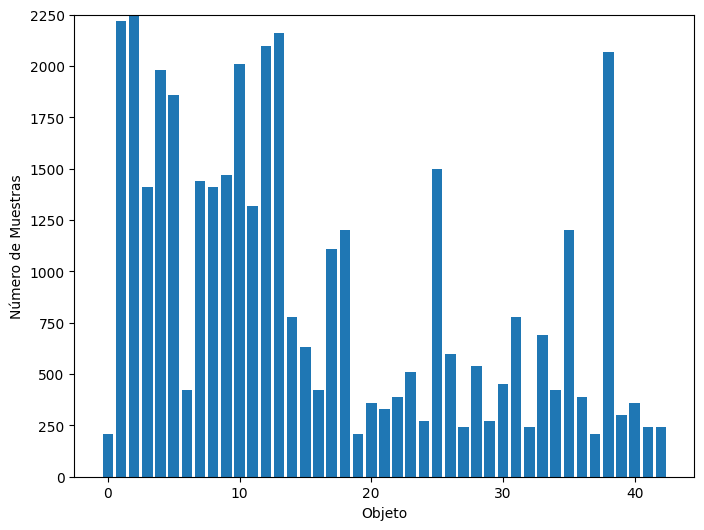

In [19]:
n_muestras = []
n_objetos = 43

for n in range(n_objetos):
    n_muestras.append(len(IList[n]))  

max_muestras = max(n_muestras)  # Obtén el valor máximo de n_muestras

plt.figure(figsize=(8, 6))
plt.bar(range(n_objetos), n_muestras)
plt.ylim(0, max_muestras)  # Establece el límite superior en el eje Y
plt.xlabel("Objeto")
plt.ylabel("Número de Muestras")
plt.show()


In [6]:
print(X.shape)

(39209, 75, 75, 3)


Creamos las etiquetas de la salida

In [7]:
Y0 = [0] * len(ID0)
Y1 = [1] * len(ID1)
Y2 = [2] * len(ID2)
Y3 = [3] * len(ID3)
Y4 = [4] * len(ID4)
Y5 = [5] * len(ID5)
Y6 = [6] * len(ID6)
Y7 = [7] * len(ID7)
Y8 = [8] * len(ID8)
Y9 = [9] * len(ID9)
Y10 = [10] * len(ID10)
Y11 = [11] * len(ID11)
Y12 = [12] * len(ID12)
Y13 = [13] * len(ID13)
Y14 = [14] * len(ID14)
Y15 = [15] * len(ID15)
Y16 = [16] * len(ID16)
Y17 = [17] * len(ID17)
Y18 = [18] * len(ID18)
Y19 = [19] * len(ID19)
Y20 = [20] * len(ID20)
Y21 = [21] * len(ID21)
Y22 = [22] * len(ID22)
Y23 = [23] * len(ID23)
Y24 = [24] * len(ID24)
Y25 = [25] * len(ID25)
Y26 = [26] * len(ID26)
Y27 = [27] * len(ID27)
Y28 = [28] * len(ID28)
Y29 = [29] * len(ID29)
Y30 = [30] * len(ID30)
Y31 = [31] * len(ID31)
Y32 = [32] * len(ID32)
Y33 = [33] * len(ID33)
Y34 = [34] * len(ID34)
Y35 = [35] * len(ID35)
Y36 = [36] * len(ID36)
Y37 = [37] * len(ID37)
Y38 = [38] * len(ID38)
Y39 = [39] * len(ID39)
Y40 = [40] * len(ID40)
Y41 = [41] * len(ID41)
Y42 = [42] * len(ID42)

Hacemos one hot encoding para cada salida

In [8]:
Y = to_categorical (Y0+Y1+Y2+Y3+Y4+Y5+Y6+Y7+Y8+Y9+Y10+Y11+Y12+Y13+Y14+Y15+Y16+Y17+Y18+Y19+Y20+Y21+Y22+Y23+Y24+Y25+Y26+Y27+Y28+Y29+Y30+Y31+Y32+Y33+Y34+Y35+Y36+Y37+Y38+Y39+Y40+Y41+Y42,43)
Y = np.array(Y)

In [9]:
print(Y.shape)

(39209, 43)


Se separa un 15% del set de entrenamiento para fines de validación

In [10]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.15, random_state=42)

Creamos los datos de entrenamiento y de validacion, con stratified shuffle para ayudar con el desbalance de clases

In [11]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit

# Obtener los índices de las imágenes y las etiquetas
indices = np.arange(len(X_train))
etiquetas = np.argmax(y_train, axis=1)

# Crear el objeto StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Obtener los índices de entrenamiento y validación estratificados
train_indices, val_indices = next(sss.split(indices, etiquetas))

# Obtener los conjuntos de entrenamiento y validación estratificados
X_train_strat = X_train[train_indices]
y_train_strat = y_train[train_indices]
X_val_strat = X_train[val_indices]
y_val_strat = y_train[val_indices]

Usamos pesos en cada clase para ayudar con el desbalance

In [27]:
from sklearn.utils import compute_class_weight

num_images = [210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]

# Generar las etiquetas
labels = []
for i, num in enumerate(num_images):
    labels.extend([i] * num)

# Calcular los pesos de clase
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(labels),
                                        y = labels                                                    
                                    )
class_weights = dict(zip(np.unique(labels), class_weights))
class_weights



{0: 4.342081949058693,
 1: 0.41073748166771423,
 2: 0.4052609819121447,
 3: 0.6466930562427841,
 4: 0.46052384308198263,
 5: 0.49023505876469115,
 6: 2.1710409745293466,
 7: 0.6332202842377261,
 8: 0.6466930562427841,
 9: 0.620297421294099,
 10: 0.45365035288672917,
 11: 0.6907857646229739,
 12: 0.4342081949058693,
 13: 0.4221468561584841,
 14: 1.1690220632081096,
 15: 1.447360649686231,
 16: 2.1710409745293466,
 17: 0.8214749633354285,
 18: 0.7598643410852713,
 19: 4.342081949058693,
 20: 2.5328811369509046,
 21: 2.7631430584918957,
 22: 2.3380441264162193,
 23: 1.7879160966712266,
 24: 3.3771748492678726,
 25: 0.6078914728682171,
 26: 1.5197286821705427,
 27: 3.7993217054263564,
 28: 1.6885874246339363,
 29: 3.3771748492678726,
 30: 2.0263049095607237,
 31: 1.1690220632081096,
 32: 3.7993217054263564,
 33: 1.3234212036318223,
 34: 2.1710409745293466,
 35: 0.7598643410852713,
 36: 2.3380441264162193,
 37: 4.342081949058693,
 38: 0.44050106729580946,
 39: 3.0394573643410854,
 40: 2.532

Se Define el modelo, con 3 filtros de entrada y posteriormente una red neuronal. Al ser imagenes de 75*75 estamos usando 5625 neuronas de entrada, 

In [56]:
from tensorflow.keras import regularizers
# Crear el modelo secuencial
model = Sequential()

# Agregar capas convolucionales y de pooling
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(75, 75, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=4, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Aplanar los datos y agregar capas densas
model.add(Flatten())
model.add(Dense(units=5625, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=2250, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1125, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=225, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.25))
model.add(Dense(units=43, activation='softmax'))

# Compilar el modelo con los pesos de clase
model.compile(optimizer=Adam(learning_rate=0.0025),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              sample_weight_mode=class_weights,
             weighted_metrics=[])

# Resumen del modelo
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 71, 71, 32)        2432      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 33, 33, 16)        4624      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 dropout_63 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 4)       

Entrenamos el modelo tomando en cuenta los pesos de las clases, con 60 epocas y batch de 500

In [57]:
# Create an array of weights for each sample
sample_weights = np.array([class_weights[np.argmax(label)] for label in y_train])
history = model.fit(X_train, y_train, validation_split=0.15, epochs=60, batch_size=500, verbose=1, shuffle=True, sample_weight=sample_weights)

Epoch 1/60
57/57 [==============================] - 46s 789ms/step - loss: 4.5070 - accuracy: 0.0247 - val_loss: 3.9198 - val_accuracy: 0.0098
Epoch 2/60
57/57 [==============================] - 46s 816ms/step - loss: 3.7290 - accuracy: 0.0313 - val_loss: 3.6140 - val_accuracy: 0.0190
Epoch 3/60
57/57 [==============================] - 45s 795ms/step - loss: 3.4316 - accuracy: 0.0543 - val_loss: 3.2553 - val_accuracy: 0.1086
Epoch 4/60
57/57 [==============================] - 45s 797ms/step - loss: 2.8561 - accuracy: 0.1296 - val_loss: 2.4032 - val_accuracy: 0.2194
Epoch 5/60
57/57 [==============================] - 45s 792ms/step - loss: 2.3099 - accuracy: 0.2707 - val_loss: 1.9147 - val_accuracy: 0.3664
Epoch 6/60
57/57 [==============================] - 45s 798ms/step - loss: 2.0329 - accuracy: 0.3440 - val_loss: 1.7648 - val_accuracy: 0.4202
Epoch 7/60
57/57 [==============================] - 48s 845ms/step - loss: 1.8362 - accuracy: 0.4037 - val_loss: 1.4910 - val_accuracy: 0.5124

Epoch 58/60
57/57 [==============================] - 47s 818ms/step - loss: 0.3765 - accuracy: 0.9126 - val_loss: 0.1940 - val_accuracy: 0.9694
Epoch 59/60
57/57 [==============================] - 46s 803ms/step - loss: 0.3744 - accuracy: 0.9140 - val_loss: 0.1908 - val_accuracy: 0.9736
Epoch 60/60
57/57 [==============================] - 48s 845ms/step - loss: 0.3281 - accuracy: 0.9198 - val_loss: 0.1667 - val_accuracy: 0.9776


In [58]:
print(X_val.shape)
print(y_val.shape)

(5882, 75, 75, 3)
(5882, 43)


Revisamos las metricas

In [59]:
scores = model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

184/184 [==============================] - 4s 23ms/step - loss: 0.1947 - accuracy: 0.9769
Test loss: 0.19471685588359833
Test accuracy: 0.9768785834312439


Text(0.5, 0, 'epoch')

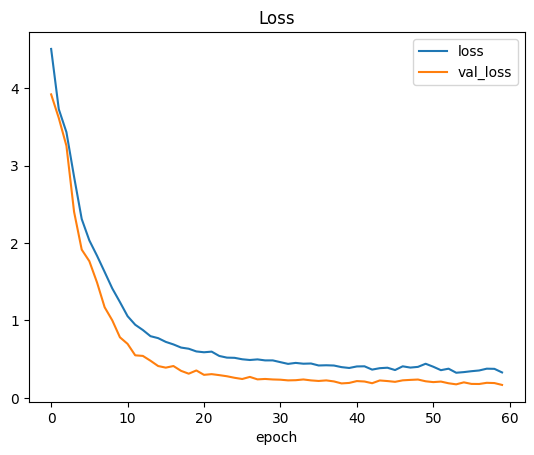

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

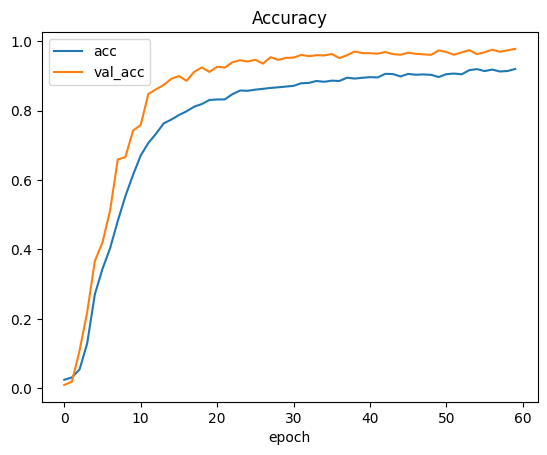

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

Ahora revisamos el modelo con una de las imagenes que hay en el folder de Test

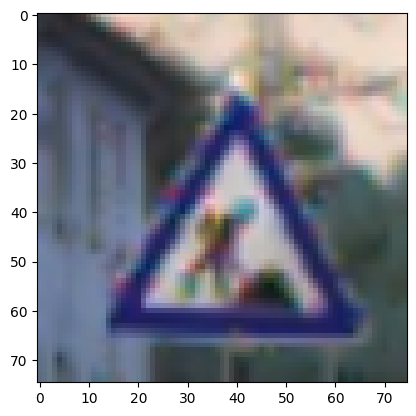

In [83]:
import cv2
import glob
import matplotlib.pyplot as plt

TstImg = glob.glob('C:/Users/44942/MNA/archive/Test/*')
random_image = random.choice(TstImg) # Selecciona la primera imagen de la lista

img_arr = cv2.imread(random_image)  # Carga la imagen utilizando cv2.imread
img_rs = cv2.resize(img_arr, (75, 75))  # Redimensiona la imagen a 25x25
img_dim = np.expand_dims(img_rs, axis=0)  # Agrega una dimensión adicional

plt.imshow(img_rs)
plt.show()

In [84]:
print(img_dim.shape)

(1, 75, 75, 3)


Revisamos que predice el modelo y comparamos la prediccion con la imagen de las imagenes de la Metadata

In [85]:
prediction = np.argmax(model.predict(img_dim), axis=-1)
print("objeto:", str(prediction))

1/1 [==============================] - 0s 21ms/step
objeto: [25]


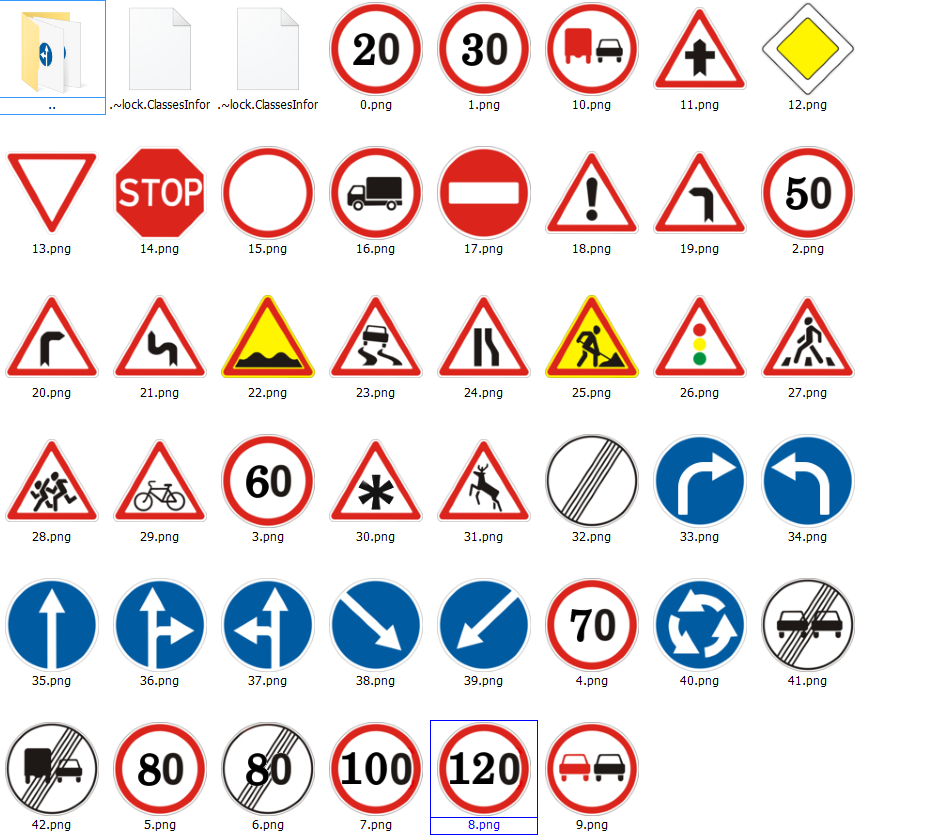

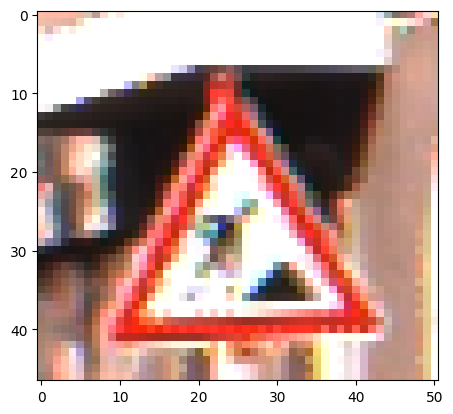

In [86]:
    img_arr = cv2.imread(ID25[3])
    plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))
    plt.show()
